# Telecom Customer Churn
This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [230]:
import pandas as pd

df = pd.read_csv("data/customer_churn.csv")
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.03,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.81,0


## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

[Source](https://www.kaggle.com/royjafari/customer-churn)  of dataset and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description. 

**Citation**: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired by a telecom company. A competitor has recently entered the market and is offering an attractive plan to new customers. The telecom company is worried that this competitor may start attracting its customers.

You have access to a dataset of the company's customers, including whether customers churned. The telecom company wants to know whether you can use this data to predict whether a customer will churn. They also want to know what factors increase the probability that a customer churns.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

## Data Understanding
- head()
- tail()
- info()
- skim()

In [231]:
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.03,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.81,0


In [232]:
df.tail()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,0
3149,8,1,11,2,1792,25,7,9,3,1,1,30,100.68,1


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [234]:
# installing package for better 'describe'
!pip install skimpy

Defaulting to user installation because normal site-packages is not writeable


In [235]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3150   │ │ int64       │ 13    │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA   ┃ NA %   ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Call Failure                │    0 │      0 │     7.6 │    7.3 │    0 │      1 │     12 │     36 │  █▅▃▁   │  │
│ │ Complaints                  │    0 │      0 │   0.077 │   0.27 │    0 │      0 │      0 │      1 │ █    ▁  │  │
│ │ Subscription Length         │    0 │      0 │      33 │    8.6 │    3 │     30 │     38 │     47 │  ▁▁▃█▃  │  │
│ │ Charge Amount               │    0 │      0 │    0.94 │    1.5 │    0 │      0 │      1 │     10 │   █▂    │  │
│ │ Seconds of Use              │    0 │      0 │    4500 │   4200 │    0 │   1400 │   6500 │  17000 │ █▄▂▁▁▁  │  │
│ │ Frequency of use            │    0 │      0 │      69 │     57 │    0 │     27 │     95 │    260 │ █▆▃▁▁▁  │  │
│ │ Frequency of SMS            │    0 │      0 │      73 │    110 │    0 │      6 │     87 │    520 │   █▁▁   │  │
│ │ Distinct Called Numbers     │    0 │      0 │      24 │     17 │    0 │     10 │     34 │     97 │  █▇▄▁▁  │  │
│ │ Age Group                   │    0 │      0 │     2.8 │   0.89 │    1 │      2 │      3 │      5 │ ▁▆ █▂▁  │  │
│ │ Tariff Plan                 │    0 │      0 │     1.1 │   0.27 │    1 │      1 │      1 │      2 │ █    ▁  │  │
│ │ Status                      │    0 │      0 │     1.2 │   0.43 │    1 │      1 │      1 │      2 │ █    ▃  │  │
│ │ Age                         │    0 │      0 │      31 │    8.8 │   15 │     25 │     30 │     55 │ ▁▆█ ▂▁  │  │
│ │ Customer Value              │    0 │      0 │     470 │    520 │    0 │    110 │    790 │   2200 │  █▁▂▁   │  │
│ │ Churn                       │    0 │      0 │    0.16 │   0.36 │    0 │      0 │      0 │      1 │ █    ▁  │  │
│ └─────────────────────────────┴──────┴────────┴─────────┴────────┴──────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Explanatory Data Analysis

In [236]:
import plotly.express as px

# Create a pie chart using plotly
fig = px.pie(df, names="Churn")

# Adding title to the plot and centering it
fig.update_layout(title={'text': "Churn Count", 'x': 0.5})

# Saving the plot with high resolution
fig.write_image("churn_count.png", engine="kaleido", scale=2)

fig.show()

## Which age groups are the customers who canceled their phone subscriptions?

In [237]:
# Importing necessary libraries
import plotly.io as pio
import plotly.express as px

# Grouping customers by age groups and churn
age_group_churn = df.groupby(['Age Group', 'Churn']).size().reset_index(name='Count')

# Creating the plot
fig = px.bar(age_group_churn, x='Age Group', y='Count', color='Churn', barmode='group')

# Adding title to the plot and centering it
fig.update_layout(title={'text': 'Customer Churn by Age Groups', 'x': 0.5})

# Saving the plot with high resolution
fig.write_image("churn_plot_by_age_groups.png", engine="kaleido", scale=2)

# Displaying the plot
fig.show()

In [238]:
# Grouping customers by age and churn
age_churn = df.groupby(['Age', 'Churn']).size().reset_index(name='Count')

# Creating the plot
fig = px.bar(age_churn, x='Age', y='Count', color='Churn', barmode='group')

# Adding title to the plot and centering it
fig.update_layout(title={'text': 'Customer Churn by Age', 'x': 0.5})

# Saving the plot with high resolution
fig.write_image("churn_plot_by_age.png", engine="kaleido", scale=2)

# Displaying the plot
fig.show()

In [239]:
# Calculate the percentage of churned customers in each age group
age_group_churn['Percentage'] = age_group_churn.groupby('Age Group')['Count'].apply(lambda x: x / x.sum() * 100)

# Create the plot
fig = px.bar(age_group_churn, x='Age Group', y='Percentage', color='Churn', barmode='group')

# Adding title to the plot and centering it
fig.update_layout(title={'text': 'Customer Churn Percentage by Age Groups', 'x': 0.5})

# Saving the plot with high resolution
fig.write_image("churn_plot_by_age.png", engine="kaleido", scale=2)

# Display the plot
fig.show()

We have drawn the following conclusions from the graphs above:
- 5 different age groups represent 5 different ages in the data set (1 - 15 years old, 2 - 25 years old, 3 - 30 years old, 4 - 45 years old, 5 - 55 years old).
- None of the users in the 15 year old group canceled their membership.
- 18% (184 users) of users in the 25 age group canceled their membership
- 16% (230 users) of users in the 30 age group have cancelled their membership
- 20% of users in the 45 age group (79 users) have cancelled their membership
- Only 1% of users in the 55 age group (2 users) have cancelled their membership.

## How long was the subscription length of users who canceled their membership?

In [240]:
# Import libraries
import plotly.express as px
import numpy as np

# Group by month and churn status
month_churn = df.groupby(['Subscription Length', 'Churn']).size().reset_index(name='Count')

# Create the plot with more bins and increased x-axis numbers
fig = px.histogram(month_churn, x='Subscription Length', y='Count', color='Churn')

# Adding title to the plot and centering it
fig.update_layout(title={'text': 'Customer Churn by Subscription Length', 'x': 0.5})

# Update x-axis tick labels
fig.update_layout(xaxis=dict(tickmode='linear', dtick=5))

# Calculate mean and median
mean = np.mean(month_churn[month_churn['Churn'] == 1]['Subscription Length'])
median = np.median(month_churn[month_churn['Churn'] == 1]['Subscription Length'])

# Adding mean and median as vertical lines
fig.add_vline(x=mean, line_dash='dash', line_color='red', annotation_text=f'Mean: {mean:.2f}', annotation_position='left')
fig.add_vline(x=median, line_dash='dash', line_color='green', annotation_text=f'Median: {median:.2f}', annotation_position='right')


# Display the plot
fig.show()

# Saving the plot with high resolution
fig.write_image("subscription_length_hist.png", engine="kaleido", scale=2)

print("Average Subscription Length for customers who have churned : ", mean)
print("Median Subscription Length for customers who have churned : ", median)

Average Subscription Length for customers who have churned :  24.56756756756757
Median Subscription Length for customers who have churned :  27.0


## Which features may be associated with customer churns?

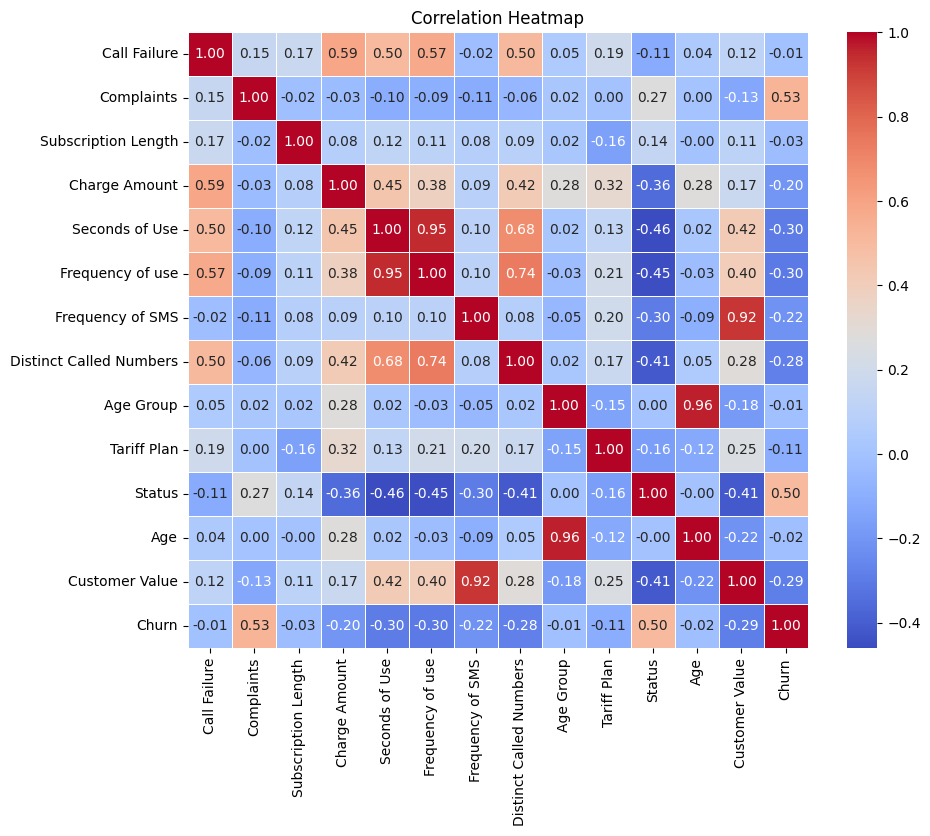

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# Save the heatmap with high resolution as png
plt.savefig("correlation_heatmap.png", dpi=300)

# Display the heatmap
plt.show()


A correlation coefficient of 0.53 between complaints and churn means that there is a moderate positive correlation between the two variables. This means that as the number of complaints increases, the probability of churn also increases. In other words, customers who have filed complaints are more likely to churn than customers who have not filed complaints.

A correlation coefficient of 0.50 between status and churn means that there is also a moderate positive correlation between the two variables. This means that as the status of a customer changes from active to inactive, the probability of churn also increases. In other words, customers who are inactive are more likely to churn than customers who are active.

A correlation coefficient of -0.30 between seconds of use and churn means that there is a weak negative correlation between the two variables. This means that as the number of seconds of use increases, the probability of churn decreases. In other words, customers who use their phones more are less likely to churn than customers who use their phones less.

A correlation coefficient of -0.30 between frequency of use and churn means that there is also a weak negative correlation between the two variables. This means that as the frequency of use increases, the probability of churn decreases. In other words, customers who use their phones more often are less likely to churn than customers who use their phones less often.

Overall, the correlation coefficients suggest that the following factors are most likely to increase the probability of customer churn:

- Filing complaints
- Changing status from active to inactive
- Using the phone less

## Relationship between 'Customer Value' and 'Churn'

In [242]:
import plotly.express as px

# Creating a scatter plot to show the relationship between customer value and churn using Plotly
fig = px.scatter(df, x='Customer Value', y='Churn')

# Adding title and centering it
fig.update_layout(
    title={
        'text': "Relationship between Customer Value and Churn",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# Saving the graph as a PNG with high resolution
fig.write_image("scatter_plot.png", engine="kaleido", scale=2)

In [243]:
import plotly.express as px

# Filtering the churned customers
churned_customers = df[df['Churn'] == 1]

# Creating a histogram of customer value for churned customers
fig = px.histogram(churned_customers, x='Customer Value', nbins=20)

# Calculating mean and median
mean_value = churned_customers['Customer Value'].mean()
median_value = churned_customers['Customer Value'].median()

# Adding mean and median as vertical lines
fig.add_vline(x=mean_value, line_dash='dash', line_color='red', annotation_text=f'Mean: {mean_value:.2f}', annotation_position='right')
fig.add_vline(x=median_value, line_dash='dash', line_color='green', annotation_text=f'Median: {median_value:.2f}', annotation_position='left')

# Adding title and centering it
fig.update_layout(
    title={
        'text': 'Histogram of Customer Value for Churned Customers',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# Saving the graph as a PNG with high resolution
fig.write_image('histogram.png', engine='kaleido', scale=2)

print("Average Customer Value for customers who have churned : ", mean_value)
print("Median Customer Value for customers who have churned : ", median_value)

Average Customer Value for customers who have churned :  124.81141414141413
Median Customer Value for customers who have churned :  96.84


In [244]:
import plotly.express as px

# Creating a boxplot of customer value for churned customers
fig = px.box(churned_customers, y='Customer Value')

# Adding title and centering it
fig.update_layout(
    title={
        'text': 'Boxplot of Customer Value for Churned Customers',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# Saving the graph as a PNG with high resolution
fig.write_image('boxplot.png', engine='kaleido', scale=2)

Looking at the graphs above, we reach three conclusions.
- No customer with a Customer Value above 1000 has churned
- The customer value of churned customers was mostly between 0-400.
- The average user value of churned customers was 124.81, while the median value was 96.84 

## Relationship between Status and Churn

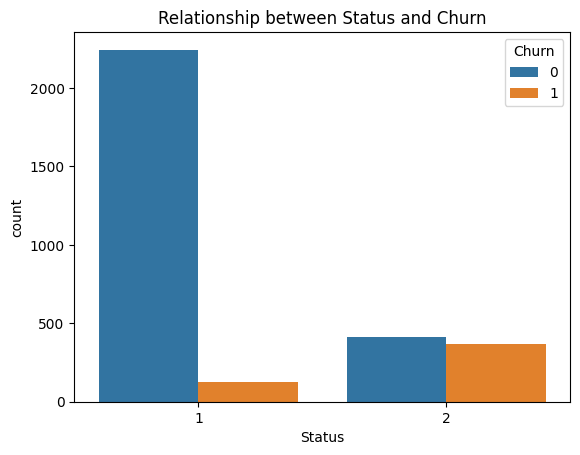

In [245]:
# Relationship between Status and Churn

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Status', hue='Churn')
plt.title('Relationship between Status and Churn')
plt.savefig('status_churn.png', dpi=300)
plt.show()

Among active customers (1), the rate of customers who have churned is very low, while among inactive customers (2), the rate of customers who have churned is very close to the rate of customers who have not churned.

## Relationship between Complaints and Churn

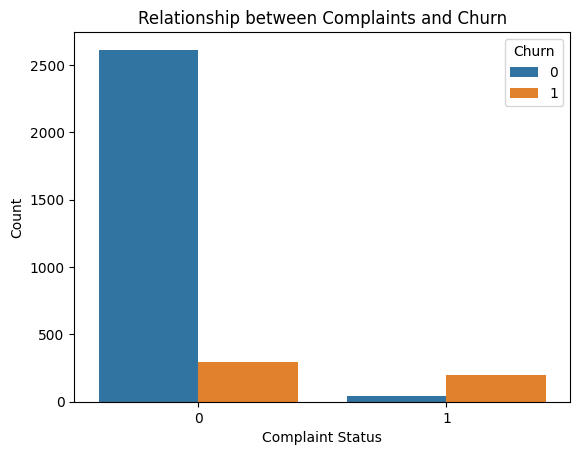

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Complaints', hue='Churn')
plt.title('Relationship between Complaints and Churn')
plt.xlabel('Complaint Status')
plt.ylabel('Count')
plt.savefig('complaints_churn.png', dpi=300)
plt.show()

For non-complaining customers (0), the proportion of customers who have churned is very low, while for complaining customers (1), the proportion of customers who have churned is very high compared to customers who have not churned.

# Machine Learning

## Normalization

In [247]:
# Normalize continuous variables using StandardScaler
from sklearn.preprocessing import StandardScaler

# Select the continuous variables to normalize
continuous_vars = ['Age', 'Subscription Length', 'Charge Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers','Customer Value']

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the continuous variables
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])


In [248]:
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,0.64,-0.62,-0.02,0.03,-0.61,-0.38,3,1,1,-0.11,-0.53,0
1,0,0,0.75,-0.62,-0.99,-1.12,-0.59,-1.13,2,1,2,-0.68,-0.82,0
2,10,0,0.52,-0.62,-0.48,-0.16,2.55,0.03,3,1,1,-0.11,2.06,0
3,10,0,0.64,-0.62,-0.07,-0.06,-0.64,0.67,1,1,1,-1.81,-0.45,0
4,3,0,0.64,-0.62,-0.50,-0.20,-0.63,0.55,1,1,1,-1.81,-0.63,0


## Train Test Split

In [249]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Select the features and target variable
features = df.drop('Churn', axis=1)
target = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## Churn Prediction

We will use the lazypredict package to see which Machine Learning Algorithm works best on our dataset

In [250]:
# Install LazyPredict
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable


In [251]:
# Import LazyPredict
from lazypredict.Supervised import LazyClassifier

# Create LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the model
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their performance
models

100%|██████████| 29/29 [00:02<00:00, 11.32it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.95,0.90,0.90,0.95,0.12
KNeighborsClassifier,0.93,0.89,0.89,0.93,0.03
XGBClassifier,0.95,0.89,0.89,0.95,0.23
LabelPropagation,0.94,0.89,0.89,0.94,0.27
LabelSpreading,0.93,0.88,0.88,0.93,0.30
RandomForestClassifier,0.94,0.88,0.88,0.94,0.32
ExtraTreesClassifier,0.94,0.87,0.87,0.94,0.19
DecisionTreeClassifier,0.93,0.87,0.87,0.93,0.02
BaggingClassifier,0.93,0.86,0.86,0.93,0.08


We can choose one of the these 3 Machine Learning Models to predict customer churn :
- LGBMClassifier (Accuracy: 0.950, Time Taken: 0.312)
- KNeighborsClassifier (Accuracy: 0.930, Time Taken: 0.027)
- DecisionTreeClassifier (Accuracy: 0.928, Time Taken: 0.017)

# LGBMClassifier

## Model with default parameters

In [252]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
# Import libraries
from sklearn.metrics import accuracy_score

# Fit the model
lgbm.fit(X_train, y_train)

# Predict on training and test data
train_predictions = lgbm.predict(X_train)
test_predictions = lgbm.predict(X_test)

# Calculate accuracy scores
train_score = accuracy_score(y_train, train_predictions)
test_score = accuracy_score(y_test, test_predictions)

display(train_score, test_score)

from sklearn.metrics import classification_report

# Generate classification report
classification_report = classification_report(y_test, test_predictions)

print(classification_report)

0.9936507936507937

0.9428571428571428

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       520
           1       0.86      0.80      0.83       110

    accuracy                           0.94       630
   macro avg       0.91      0.89      0.90       630
weighted avg       0.94      0.94      0.94       630



## Using GridSearchCV to find the best parameters for the model

In [270]:
# Import libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7]
}

# Create LGBMClassifier
lgbm = LGBMClassifier(random_state = 42)

# Perform GridSearch
grid_search = GridSearchCV(lgbm, param_grid, cv=5,scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}

## Adding the parameters to the model

In [254]:
# Add best parameters to our model
#lgbm = LGBMClassifier(learning_rate=0.05, max_depth=7, n_estimators=200,random_state=42)
lgbm.set_params(**best_params)

LGBMClassifier(learning_rate=0.05, max_depth=7, n_estimators=200,
               random_state=42)

## Checking scores
Accuracy Score, Mean Absolute Error, R2 Score

In [262]:
# Import libraries
from sklearn.metrics import accuracy_score,mean_absolute_error, r2_score

# Fit the model
lgbm.fit(X_train, y_train)

# Predict on training and test data
train_predictions = lgbm.predict(X_train)
test_predictions = lgbm.predict(X_test)

# Calculate accuracy scores
train_score = accuracy_score(y_train, train_predictions)
test_score = accuracy_score(y_test, test_predictions)

#train_score, test_score

print("Accuracy Score: ", test_score)
print("Mean Absolute Error: ", mean_absolute_error(y_test, test_predictions))
print("R2 Score: ", r2_score(y_test, test_predictions))

Accuracy Score:  0.9476190476190476
Mean Absolute Error:  0.05238095238095238
R2 Score:  0.6365384615384615


## Classification Report

In [256]:
# Import libraries
from sklearn.metrics import classification_report

# Generate classification report
classification_report = classification_report(y_test, test_predictions)

print(classification_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       520
           1       0.89      0.80      0.84       110

    accuracy                           0.95       630
   macro avg       0.92      0.89      0.91       630
weighted avg       0.95      0.95      0.95       630



## Confusion Matrix

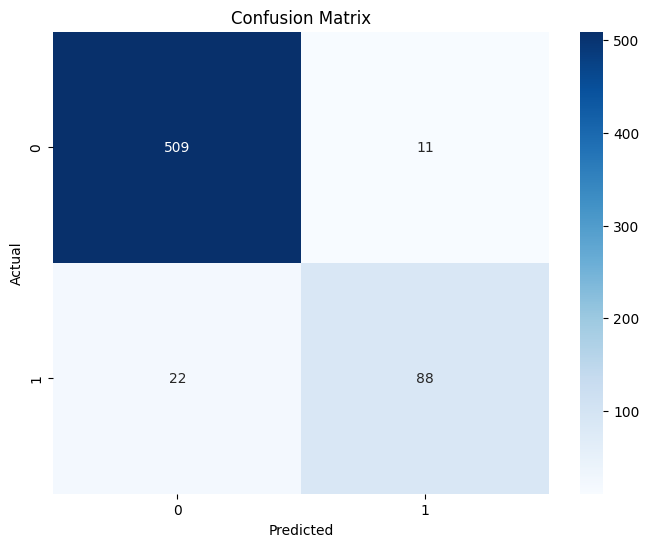

True negative (TN): 509
True positive (TP): 88
False negative (FN): 22
False positive (FP): 11


In [273]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
confusion_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("True negative (TN): 509")
print("True positive (TP): 88")
print("False negative (FN): 22")
print("False positive (FP): 11")

## Rates from Confusion Matrix
- Accuracy: Overall, how often is the classifier correct?
    - (TP + TN) / Total
- Misclassification Rate: Overall, how often is it wrong?
    - (FP + FN) / Total 
    - equivalent to 1 minus Accuracy
    - also known as "Error Rate"
- True Positive Rate: When it's actually yes, how often does it predict yes?
    - TP/actual yes 
    - also known as "Sensitivity" or "Recall"
- False Positive Rate: When it's actually no, how often does it predict yes?
    - FP/actual no 
- True Negative Rate: When it's actually no, how often does it predict no?
    - TN/actual no 
    - equivalent to 1 minus False Positive Rate
    - also known as "Specificity"
- Precision: When it predicts yes, how often is it correct?
    - TP/predicted yes 
- Prevalence: How often does the yes condition actually occur in our sample?
    - actual yes/total 

In [286]:
# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions)

# Calculate misclassification rate
misclassification_rate = 1 - accuracy

# Calculate true positive rate (sensitivity, recall)
true_positive_rate = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])

# Calculate false positive rate
false_positive_rate = confusion_matrix[0, 1] / (confusion_matrix[0, 1] + confusion_matrix[0, 0])

# Calculate true negative rate (specificity)
true_negative_rate = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])

# Calculate precision
precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])

# Calculate prevalence
prevalence = (confusion_matrix[1, 1] + confusion_matrix[1, 0]) / (confusion_matrix[0, 0] + confusion_matrix[0, 1] + confusion_matrix[1, 1] + confusion_matrix[1, 0])

print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate (Error Rate): {misclassification_rate:.2f}")
print(f"Sensitivity (Recall): {true_positive_rate:.2f}")
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"Specificity: {true_negative_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Prevalance: {prevalence:.2f}")

Accuracy: 0.95
Misclassification Rate (Error Rate): 0.05
Sensitivity (Recall): 0.80
False Positive Rate: 0.02
Specificity: 0.98
Precision: 0.89
Prevalance: 0.17


## Distribution Plot

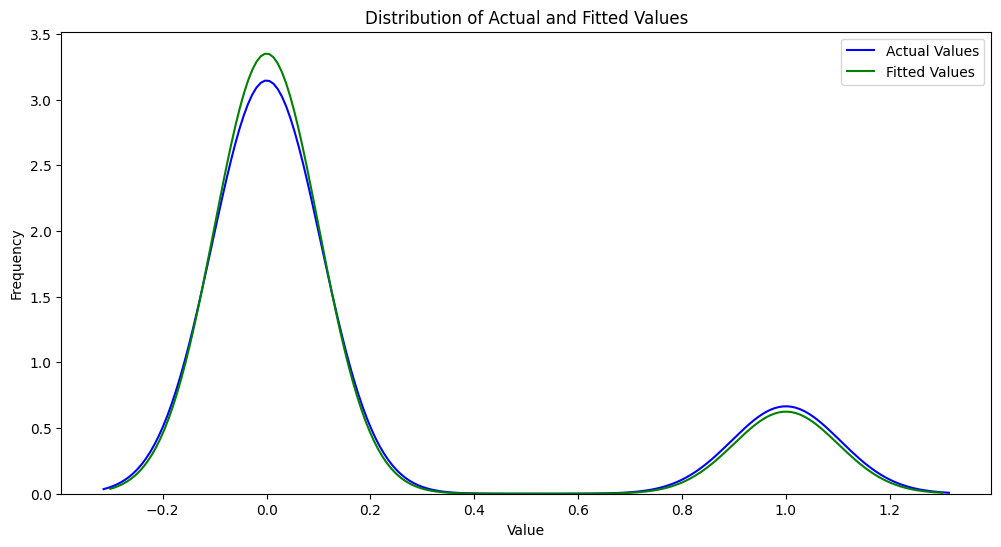

In [267]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot distribution of actual values
sns.distplot(y_test, ax=ax, kde=True, color='blue', label='Actual Values', hist = False)

# Plot distribution of fitted values
sns.distplot(test_predictions, ax=ax, kde=True, color='green', label='Fitted Values',hist = False) 

# Set plot title and labels
ax.set_title('Distribution of Actual and Fitted Values')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Add legend
ax.legend()

# Save the plot with high resolution
plt.savefig('distribution_plot_actual_fitted.png', dpi=300)

# Show the plot
plt.show()

The more the two colors overlap, the more accurate the model

## Feature Importance

In [258]:
import plotly.graph_objects as go

# Get feature importances
importances = lgbm.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Create a bar plot using plotly
fig = go.Figure(data=[go.Bar(
    x=sorted_feature_names,
    y=importances[indices],
    marker_color='rgb(26, 118, 255)'
)])

fig.update_layout(
    title= {'text': 'Feature Importance', 'x': 0.5},  # Fixed syntax error here
    xaxis=dict(
        title='Features',
        tickangle=90
    ),
    yaxis=dict(
        title='Importance'
    )
)
# Saving the graph as a PNG with high resolution
fig.write_image('feature_importance.png', engine='kaleido', scale=2)
fig.show()